    **Assignment Task:**

Your task is to perform a multiple linear regression analysis to predict the price of Toyota corolla based on the
given attributes.

    **Dataset Description:**
    
**The dataset consists of the following variables:**

**Age**: Age in years

**KM**: Accumulated Kilometers on odometer

**FuelType**: Fuel Type (Petrol, Diesel, CNG)

**HP**: Horse Power

**Automatic**: Automatic ( (Yes=1, No=0)

**CC**: Cylinder Volume in cubic centimeters


**Doors**: Number of doors

**Weight**: Weight in Kilograms

**Quarterly_Tax**:

**Price**: Offer Price in EUROs


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")

In [11]:
# Load the dataset
df = pd.read_csv("ToyotaCorolla.csv")
print(df)

      Price  Age_08_04     KM Fuel_Type   HP  Automatic    cc  Doors  \
0     13500         23  46986    Diesel   90          0  2000      3   
1     13750         23  72937    Diesel   90          0  2000      3   
2     13950         24  41711    Diesel   90          0  2000      3   
3     14950         26  48000    Diesel   90          0  2000      3   
4     13750         30  38500    Diesel   90          0  2000      3   
...     ...        ...    ...       ...  ...        ...   ...    ...   
1431   7500         69  20544    Petrol   86          0  1300      3   
1432  10845         72  19000    Petrol   86          0  1300      3   
1433   8500         71  17016    Petrol   86          0  1300      3   
1434   7250         70  16916    Petrol   86          0  1300      3   
1435   6950         76      1    Petrol  110          0  1600      5   

      Cylinders  Gears  Weight  
0             4      5    1165  
1             4      5    1165  
2             4      5    1165  
3  

In [12]:
# Perform EDA
# Check for missing values
print(df.isnull().sum())


Price        0
Age_08_04    0
KM           0
Fuel_Type    0
HP           0
Automatic    0
cc           0
Doors        0
Cylinders    0
Gears        0
Weight       0
dtype: int64


In [13]:
# Summary statistics of the dataset
print(df.describe())

              Price    Age_08_04             KM           HP    Automatic  \
count   1436.000000  1436.000000    1436.000000  1436.000000  1436.000000   
mean   10730.824513    55.947075   68533.259749   101.502089     0.055710   
std     3626.964585    18.599988   37506.448872    14.981080     0.229441   
min     4350.000000     1.000000       1.000000    69.000000     0.000000   
25%     8450.000000    44.000000   43000.000000    90.000000     0.000000   
50%     9900.000000    61.000000   63389.500000   110.000000     0.000000   
75%    11950.000000    70.000000   87020.750000   110.000000     0.000000   
max    32500.000000    80.000000  243000.000000   192.000000     1.000000   

                cc        Doors  Cylinders        Gears      Weight  
count   1436.00000  1436.000000     1436.0  1436.000000  1436.00000  
mean    1576.85585     4.033426        4.0     5.026462  1072.45961  
std      424.38677     0.952677        0.0     0.188510    52.64112  
min     1300.00000     2.0

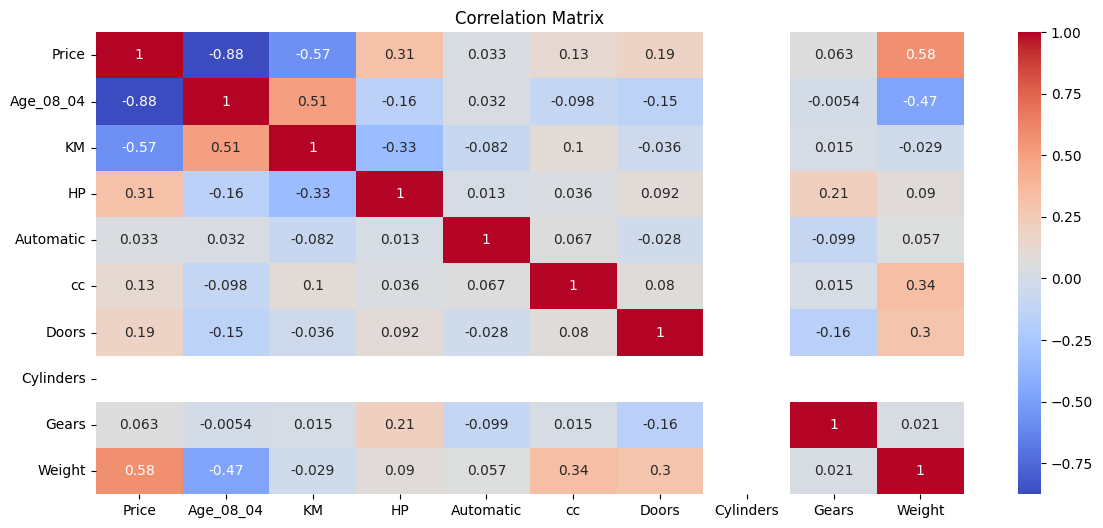

In [14]:
# Visualization
# Assuming df is your DataFrame
# Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])

plt.figure(figsize=(14, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

<Figure size 1000x600 with 0 Axes>

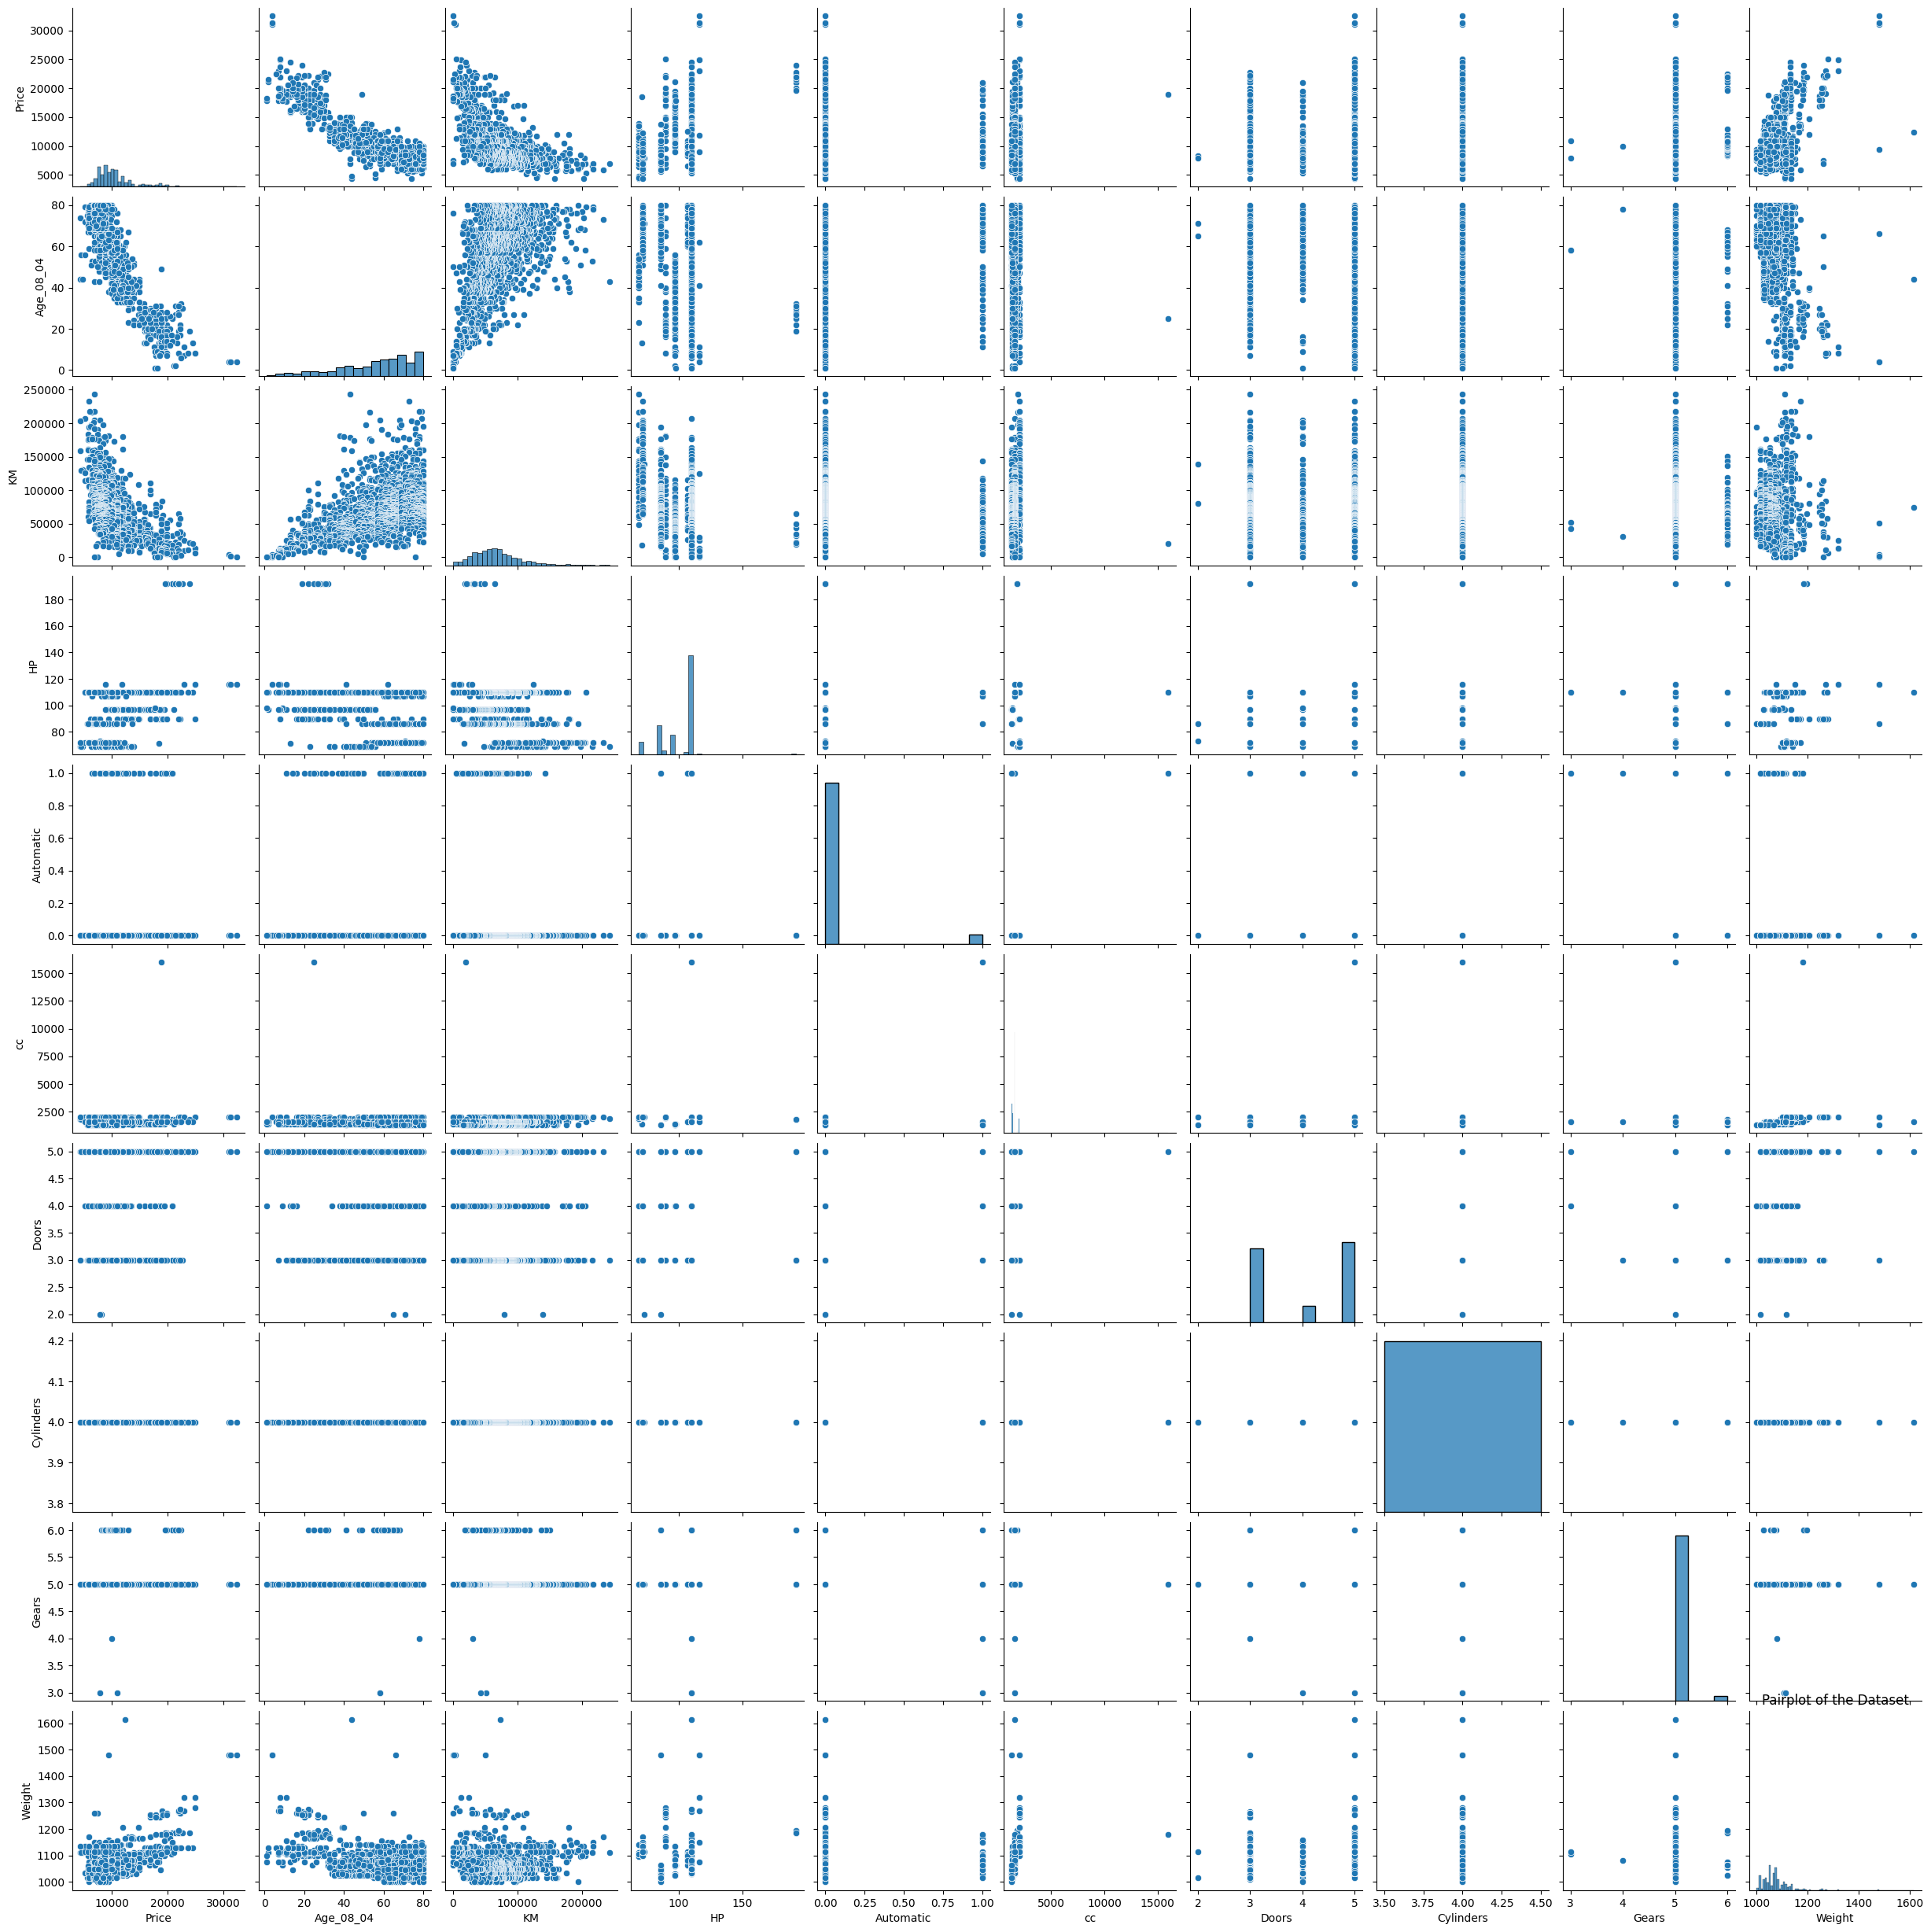

In [15]:
plt.figure(figsize=(10, 6))
sns.pairplot(df)
plt.title('Pairplot of the Dataset')
plt.show()

In [16]:
print(df.columns)

Index(['Price', 'Age_08_04', 'KM', 'Fuel_Type', 'HP', 'Automatic', 'cc',
       'Doors', 'Cylinders', 'Gears', 'Weight'],
      dtype='object')


In [51]:
# Define feature variables and target variable
X = df.drop(['Price'], axis=1)
y = df['Price']

In [28]:
# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print(X_scaled)

[[-1.77196633 -0.57469494 -0.76804185 ...  1.75856113  2.87480715
  -2.71087388]
 [-1.77196633  0.11745379 -0.76804185 ...  1.75856113  2.87480715
  -2.71087388]
 [-1.71818412 -0.71538641 -0.76804185 ...  1.75856113  2.87480715
  -2.71087388]
 ...
 [ 0.80957948 -1.37403589 -1.03513832 ... -1.09191497 -0.34784942
   0.36888474]
 [ 0.75579727 -1.37670303 -1.03513832 ... -1.09191497 -0.34784942
   0.36888474]
 [ 1.0784905  -1.82784925  0.5674405  ...  0.78939926 -0.34784942
   0.36888474]]


In [29]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [30]:
# Build and train multiple linear regression model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [31]:
# Get the model coefficients
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coefficients)

                   Coefficient
Age_08_04        -2.246662e+03
KM               -6.085706e+02
HP                2.102533e+02
Automatic         3.413608e+01
cc               -1.288507e+01
Doors            -5.743684e+01
Cylinders         2.842171e-13
Gears             1.039463e+02
Weight            1.362139e+03
Fuel_Type_Diesel -2.127088e+01
Fuel_Type_Petrol  4.451027e+02


In [34]:
# Predict on the test set
y_pred = model.predict(X_test)

In [35]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 2203043.823143705
R-squared: 0.834888804061108


In [36]:
# Build and evaluate Lasso model
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)
print(f'Lasso Mean Squared Error: {mse_lasso}')
print(f'Lasso R-squared: {r2_lasso}')

Lasso Mean Squared Error: 2202734.6519603888
Lasso R-squared: 0.8349119754675463


In [37]:
# Build and evaluate Ridge model
ridge = Ridge(alpha=0.1)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)
print(f'Ridge Mean Squared Error: {mse_ridge}')
print(f'Ridge R-squared: {r2_ridge}')

Ridge Mean Squared Error: 2202805.772078496
Ridge R-squared: 0.8349066452386907


    **Normalization & Standardization**:
Normalization scales data to a range (e.g., [0,1]), while Standardization scales data to have a mean of 0 and a standard deviation of 1. These help in improving model performance by ensuring features contribute equally, especially for distance-based models or those sensitive to scale.

    **Addressing Multicollinearity**:
Techniques include using dimensionality reduction (e.g., PCA), removing highly correlated features, or regularization methods like Lasso and Ridge, which reduce variance and handle correlated predictors effectively.